# **Machine learning-based prediction of COVID-19 diagnosis based on symptoms**

**A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources. The current dataset has been downloaded from ‘ABC’ government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome. Outcome variable is covid result test positive or negative. We have data from 11th March 2020 till 30th April 2020. Please consider 11th March till 15th April as a training and validation set. From 16th April till 30th April as a test set. Please further divide training and validation set at a ratio of 4:1.**

In [51]:
## IMPORTING ALL THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
## IMPORTING DATASET INTO PANDAS DATAFRAME
data = pd.read_csv('corona_tested_006.csv')

<ipython-input-52-39804da39572>:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('corona_tested_006.csv')


In [53]:
data.head() ## target variable(dependent variable) = data['corona'] = y

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           TRUE  FALSE        TRUE               FALSE   
1       2  11-03-2020          FALSE   TRUE       FALSE               FALSE   
2       3  11-03-2020          FALSE   TRUE       FALSE               FALSE   
3       4  11-03-2020           TRUE  FALSE       FALSE               FALSE   
4       5  11-03-2020           TRUE  FALSE       FALSE               FALSE   

  Headache    Corona Age_60_above   Sex           Known_contact  
0    FALSE  negative         None  None                  Abroad  
1    FALSE  positive         None  None                  Abroad  
2    FALSE  positive         None  None                  Abroad  
3    FALSE  negative         None  None                  Abroad  
4    FALSE  negative         None  None  Contact with confirmed

**Our DataFrame consists of null values as 'None'**

In [54]:
data.tail() # None = null values

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat  \
278843  278844  30-04-2020          False  False       False   
278844  278845  30-04-2020          False  False       False   
278845  278846  30-04-2020          False  False       False   
278846  278847  30-04-2020          False  False       False   
278847  278848  30-04-2020          False  False       False   

       Shortness_of_breath Headache    Corona Age_60_above     Sex  \
278843               False    False  positive         None    male   
278844               False    False  negative         None  female   
278845               False    False  negative         None    male   
278846               False    False  negative         None    male   
278847               False    False  negative         None  female   

       Known_contact  
278843         Other  
278844         Other  
278845         Other  
278846         Other  
278847         Other

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [56]:
data.shape

(278848, 11)

In [57]:
data.describe(include = 'all')

Ind_ID   Test_date Cough_symptoms   Fever Sore_throat  \
count   278848.000000      278848         278848  278848      278848   
unique            NaN          51              5       5           5   
top               NaN  20-04-2020          False   False       False   
freq              NaN       10921         127531  137774      212584   
mean    139424.500000         NaN            NaN     NaN         NaN   
std      80496.628269         NaN            NaN     NaN         NaN   
min          1.000000         NaN            NaN     NaN         NaN   
25%      69712.750000         NaN            NaN     NaN         NaN   
50%     139424.500000         NaN            NaN     NaN         NaN   
75%     209136.250000         NaN            NaN     NaN         NaN   
max     278848.000000         NaN            NaN     NaN         NaN   

       Shortness_of_breath Headache    Corona Age_60_above     Sex  \
count               278848   278848    278848       278848  278848   
unique                   5        5         3            3       3   
top                  False    False  negative         None  female   
freq                212842   212326    260227       127320  130158   
mean                   NaN      NaN       NaN          NaN     NaN   
std                    NaN      NaN       NaN          NaN     NaN   
min                    NaN      NaN       NaN          NaN     NaN   
25%                    NaN      NaN       NaN          NaN     NaN   
50%                    NaN      NaN       NaN          NaN     NaN   
75%                    NaN      NaN       NaN          NaN     NaN   
max                    NaN      NaN       NaN          NaN     NaN   

       Known_contact  
count         278848  
unique             3  
top            Other  
freq          242741  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN

In [58]:
data.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [59]:
print("Age_60_above",data['Age_60_above'].unique())
print("Sex",data['Sex'].unique())
print("Known_contact",data['Known_contact'].unique())
print("Corona",data['Corona'].unique())
print("Cough_symptoms",data['Cough_symptoms'].unique())



Age_60_above ['None' 'No' 'Yes']
Sex ['None' 'male' 'female']
Known_contact ['Abroad' 'Contact with confirmed' 'Other']
Corona ['negative' 'positive' 'other']
Cough_symptoms ['TRUE' 'FALSE' 'None' False True]


# **Feature Engineering**

In [60]:
## FEATURE ENGINEERING
## TRANSFORMING CATEGORICAL VARIABLES INTO NUMERICAL VARIABLES

from sklearn.preprocessing import LabelEncoder

# Define the custom mappings(creating pipeline)
custom_mappings = {
    'Cough_symptoms': {'TRUE': 1, 'FALSE': 0, 'None': -1}, # using -1 as a placeholder for missing or unknown values
    'Fever': {'TRUE': 1, 'FALSE': 0, 'None': -1},
    'Sore_throat': {'TRUE': 1, 'FALSE': 0, 'None': -1},
    'Shortness_of_breath': {'TRUE': 1, 'FALSE': 0, 'None': -1},
    'Headache': {'TRUE': 1, 'FALSE': 0, 'None': -1},
    'Corona': {'negative': 0, 'positive': 1, 'None': -1},
    'Age_60_above': {'None': -1, 'No': 0, 'Yes': 1},
    'Sex': {'None': -1, 'male': 1, 'female': 2},
    'Known_contact': {'Abroad': 1, 'Contact with confirmed': 2, 'Other': 3, 'None': -1}
}

# label encoding with custom mappings
for column, mappings in custom_mappings.items():
    le = LabelEncoder()
    data[column] = data[column].map(mappings).fillna(-1)

print(data)

        Ind_ID   Test_date  Cough_symptoms  Fever  Sore_throat  \
0            1  11-03-2020             1.0    0.0          1.0   
1            2  11-03-2020             0.0    1.0          0.0   
2            3  11-03-2020             0.0    1.0          0.0   
3            4  11-03-2020             1.0    0.0          0.0   
4            5  11-03-2020             1.0    0.0          0.0   
...        ...         ...             ...    ...          ...   
278843  278844  30-04-2020            -1.0   -1.0         -1.0   
278844  278845  30-04-2020            -1.0   -1.0         -1.0   
278845  278846  30-04-2020            -1.0   -1.0         -1.0   
278846  278847  30-04-2020            -1.0   -1.0         -1.0   
278847  278848  30-04-2020            -1.0   -1.0         -1.0   

        Shortness_of_breath  Headache  Corona  Age_60_above  Sex  \
0                       0.0       0.0     0.0            -1   -1   
1                       0.0       0.0     1.0            -1   -1   
2  

In [61]:
## REMOVING THE INDEX COLUMN

data.reset_index(drop = True, inplace = True)
print(data)

# drop = True: to drop the existing index column.
# drop = False: the old index will be added as a new column in the DataFrame

        Ind_ID   Test_date  Cough_symptoms  Fever  Sore_throat  \
0            1  11-03-2020             1.0    0.0          1.0   
1            2  11-03-2020             0.0    1.0          0.0   
2            3  11-03-2020             0.0    1.0          0.0   
3            4  11-03-2020             1.0    0.0          0.0   
4            5  11-03-2020             1.0    0.0          0.0   
...        ...         ...             ...    ...          ...   
278843  278844  30-04-2020            -1.0   -1.0         -1.0   
278844  278845  30-04-2020            -1.0   -1.0         -1.0   
278845  278846  30-04-2020            -1.0   -1.0         -1.0   
278846  278847  30-04-2020            -1.0   -1.0         -1.0   
278847  278848  30-04-2020            -1.0   -1.0         -1.0   

        Shortness_of_breath  Headache  Corona  Age_60_above  Sex  \
0                       0.0       0.0     0.0            -1   -1   
1                       0.0       0.0     1.0            -1   -1   
2  

In [62]:
## finding the counts and percentages of categories for each categorical feature in dataset

categorical_features = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache',
                        'Corona', 'Age_60_above', 'Sex', 'Known_contact']

for feature in categorical_features:
    feature_count = data[feature].value_counts()
    total_count = len(data)
    percentages = feature_count / total_count * 100

    print(f"\nCharacteristics of feature '{feature}':")
    print("---------------------------------")
    print("Category\tCount\tPercentage")
    print("---------------------------------")

    for category, count in feature_count.items():
        percentage = percentages[category]
        print(f"{category}\t{count}\t{percentage:.2f}%")


Characteristics of feature 'Cough_symptoms':
---------------------------------
Category	Count	Percentage
---------------------------------
-1.0	148028	53.09%
0.0	108837	39.03%
1.0	21983	7.88%

Characteristics of feature 'Fever':
---------------------------------
Category	Count	Percentage
---------------------------------
-1.0	148028	53.09%
0.0	119070	42.70%
1.0	11750	4.21%

Characteristics of feature 'Sore_throat':
---------------------------------
Category	Count	Percentage
---------------------------------
-1.0	213313	76.50%
0.0	64337	23.07%
1.0	1198	0.43%

Characteristics of feature 'Shortness_of_breath':
---------------------------------
Category	Count	Percentage
---------------------------------
-1.0	213313	76.50%
0.0	64428	23.11%
1.0	1107	0.40%

Characteristics of feature 'Headache':
---------------------------------
Category	Count	Percentage
---------------------------------
-1.0	213313	76.50%
0.0	64107	22.99%
1.0	1428	0.51%

Characteristics of feature 'Corona':
----------------

<ipython-input-63-de015d1efb88>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True)


<Axes: >

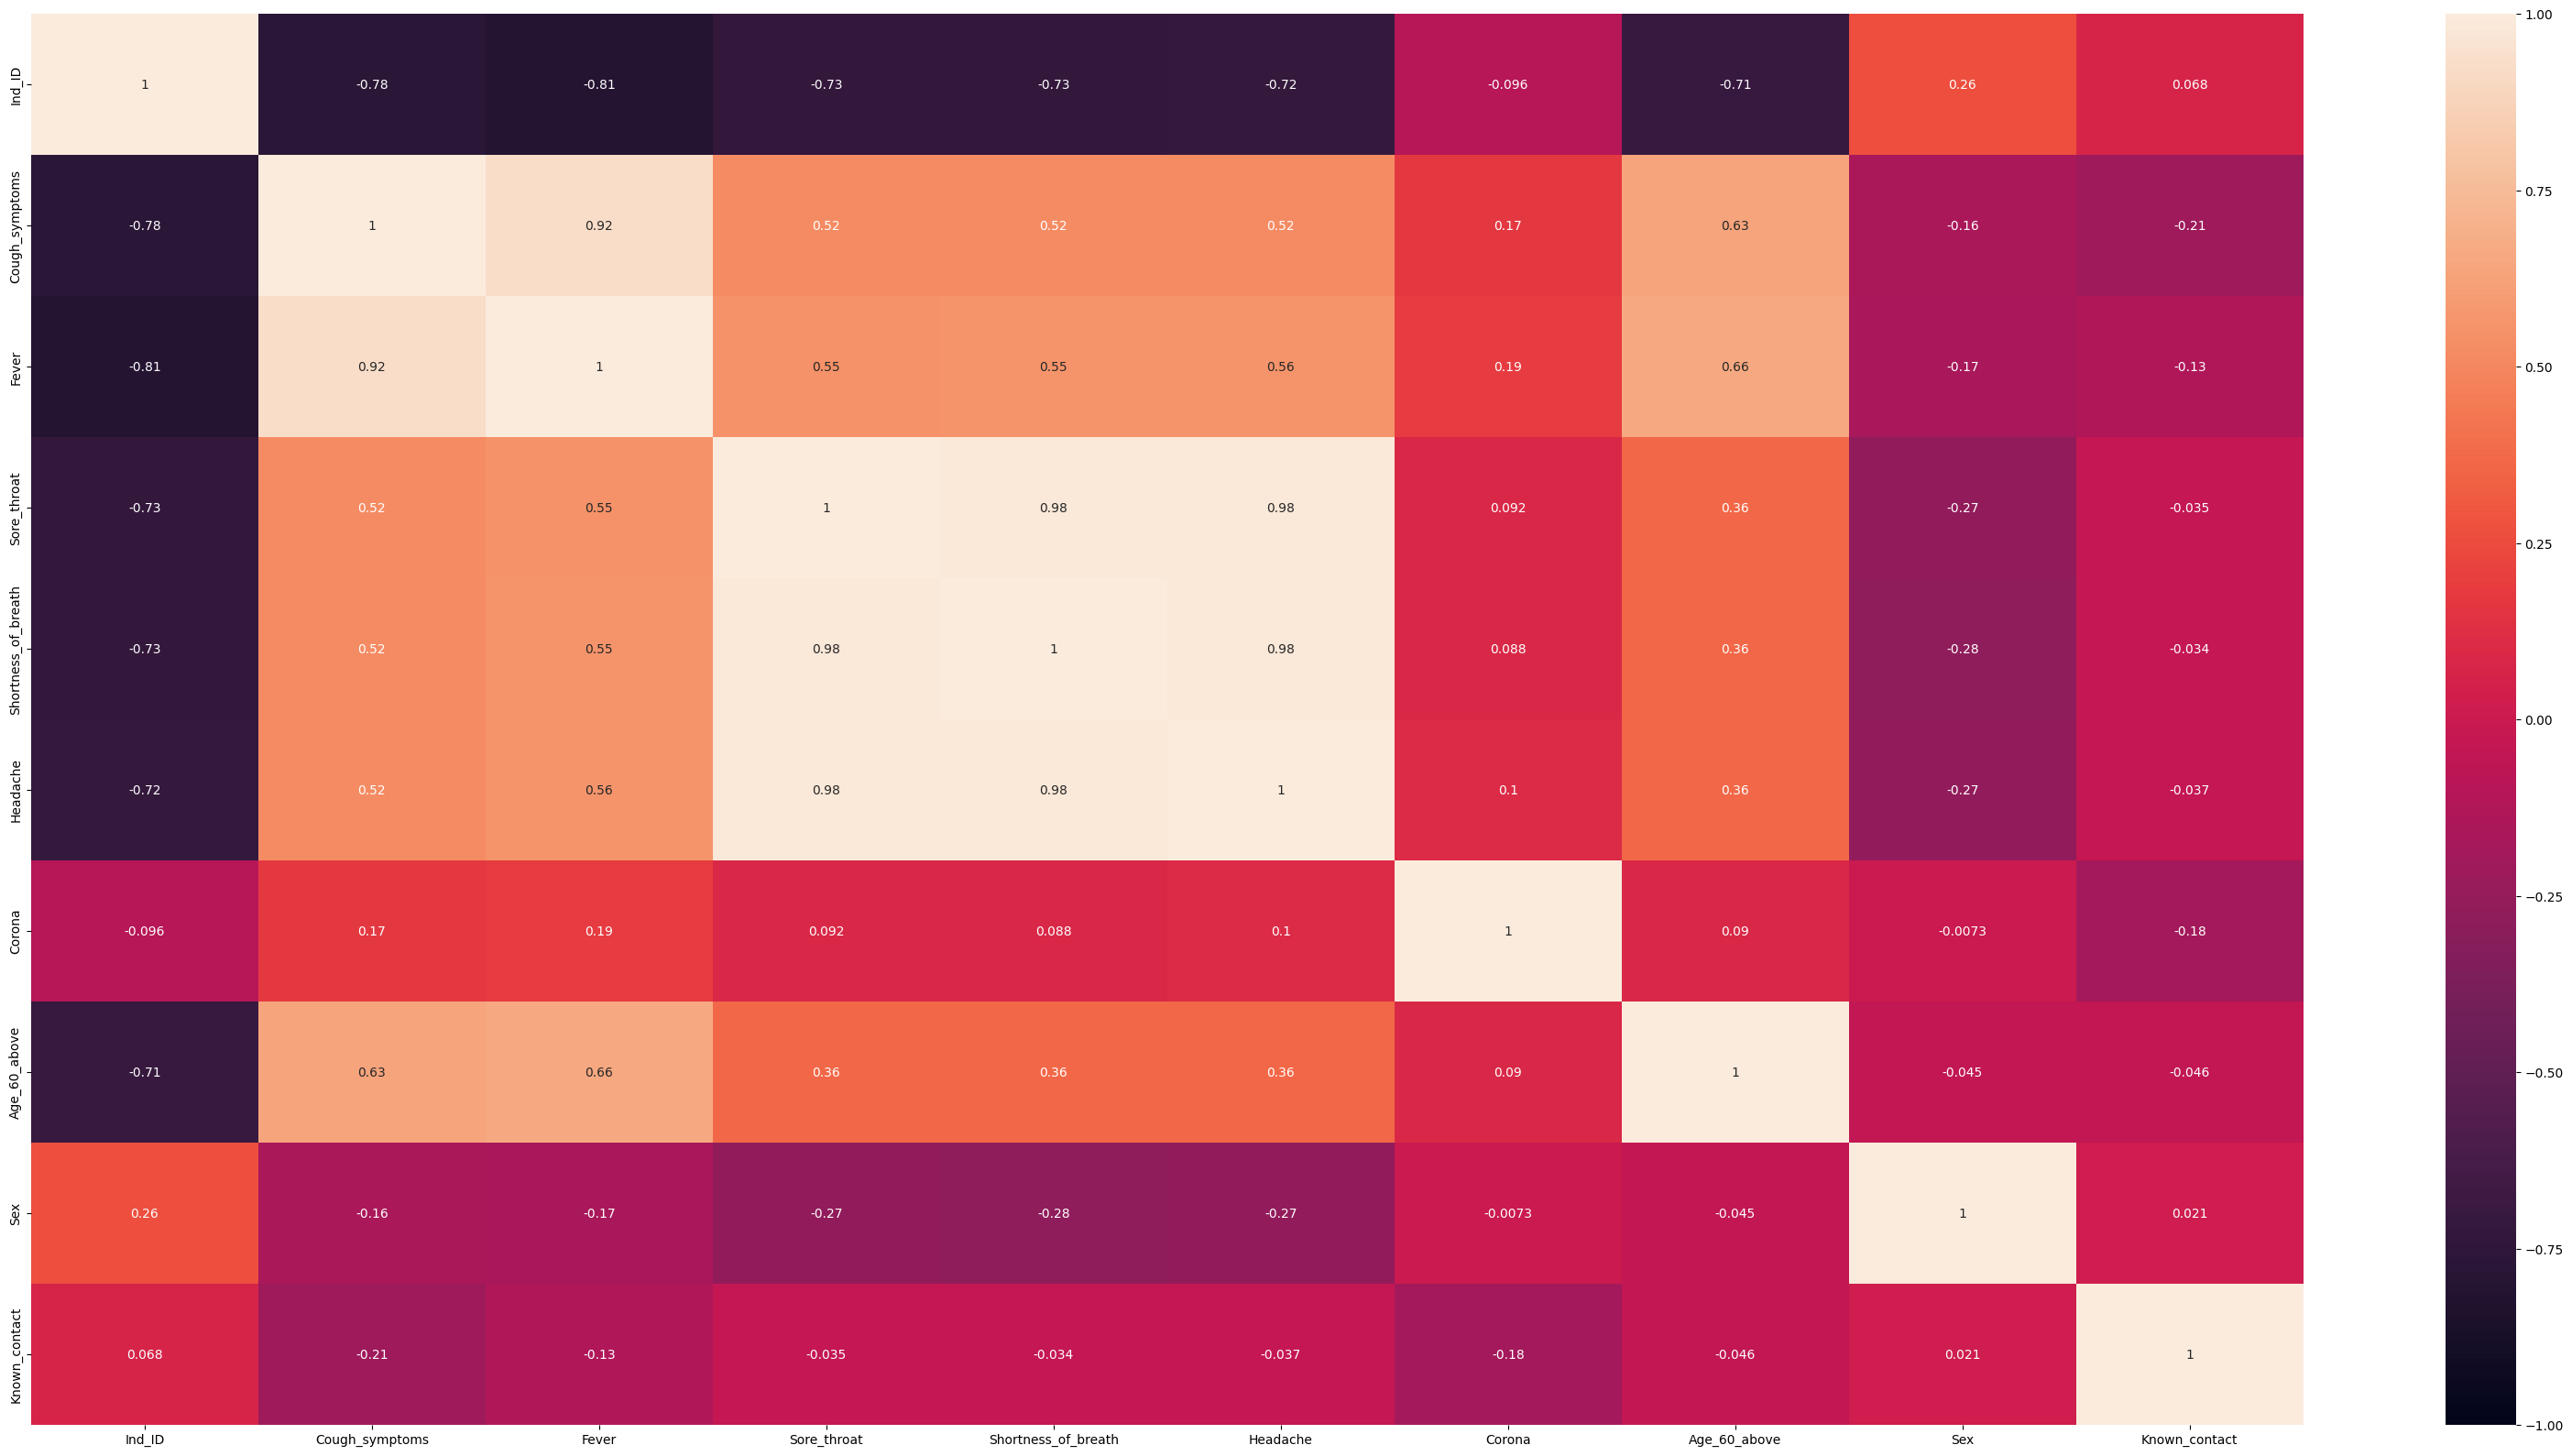

In [63]:
# finding correlation
import seaborn as sns
plt.figure(figsize=(40, 20))
sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True)

In [64]:
correlation_matrix = data.corr()

# Extracting the correlation of each feature with the target variable
correlation_with_target = correlation_matrix['Corona'].sort_values(ascending=False)

print(correlation_with_target)

Corona                 1.000000
Fever                  0.185338
Cough_symptoms         0.167286
Headache               0.104900
Sore_throat            0.091837
Age_60_above           0.090121
Shortness_of_breath    0.087897
Sex                   -0.007292
Ind_ID                -0.096194
Known_contact         -0.181809
Name: Corona, dtype: float64


<ipython-input-64-dad7882b2724>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


# **Training & Testing, Evaluation and Cross-validation, Model Selection**

In [65]:
X = data.drop('Corona', axis=1)
y = data['Corona']

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model: Random Forest
Accuracy: 0.97
Training Accuracy: 0.9916660538765105
Testing Accuracy: 0.9270797588117065
Precision: 0.96
Recall: 0.97
F1 Score: 0.97
Cross-Validation Accuracy (mean): 0.14
Cross-Validation Scores: [0.08385931 0.46222195 0.08606532 0.02950548 0.01737292]
Model Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model: Logistic Regression
Accuracy: 0.96
Training Accuracy: 0.9113170086035738
Testing Accuracy: 0.9105593411441737
Precision: 0.93
Recall: 0.96
F1 Score: 0.95
Cross-Validation Accuracy (mean): 0.91
Cross-Validation Scores: [0.91114652 0.91111588 0.91111588 0.91111588 0.91114379]
Model Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model: KNN
Accuracy: 0.96
Training Accuracy: 0.9249699732823492
Testing Accuracy: 0.9094808569047502
Precision: 0.93
Recall: 0.96
F1 Score: 0.95
Cross-Validation Accuracy (mean): 0.14
Cross-Validation Scores: [0.0739935  0.31147742 0.29045897 0.02169251 0.02252045]
Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model: Decision Tree
Accuracy: 0.97
Training Accuracy: 0.93116323912706
Testing Accuracy: 0.928550419138193
Precision: 0.96
Recall: 0.97
F1 Score: 0.97
Cross-Validation Accuracy (mean): 0.61
Cross-Validation Scores: [0.91004351 0.93381947 0.14247197 0.88436791 0.16438398]
Model Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


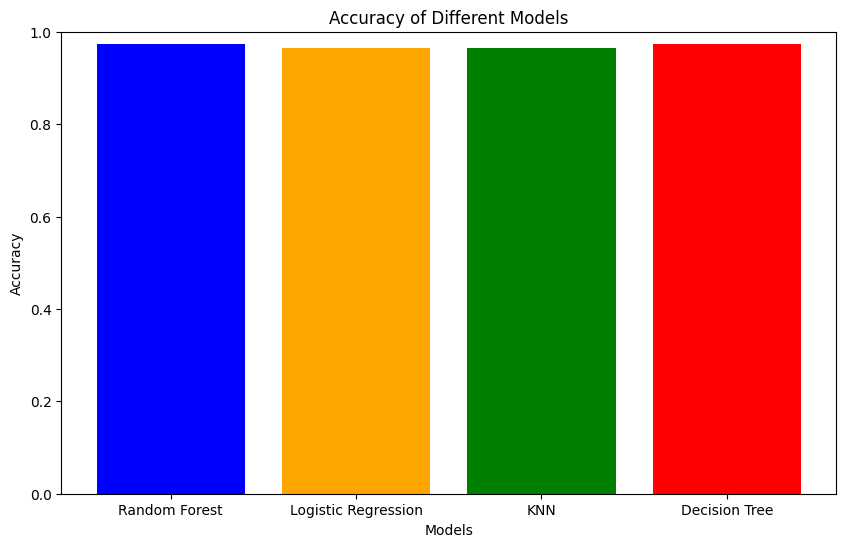

In [66]:
import datetime
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data['Test_date'] = pd.to_datetime(data['Test_date'], format='%d-%m-%Y')

# One-hot encoding the month and day columns
data['Month'] = data['Test_date'].dt.month
data['Day'] = data['Test_date'].dt.day

# Defining the date ranges
training_val_start = '2020-03-11'
training_val_end = '2020-04-15'
test_start = '2020-04-16'
test_end = '2020-04-30'

# Creating boolean masks based on the date ranges
training_val_mask = (data['Test_date'] >= training_val_start) & (data['Test_date'] <= training_val_end)
test_mask = (data['Test_date'] >= test_start) & (data['Test_date'] <= test_end)

train_val_set = data[training_val_mask]
test_set = data[test_mask]

X_train_val = train_val_set.drop(['Corona', 'Test_date'], axis=1)
y_train_val = train_val_set['Corona']
X_test = test_set.drop(['Corona', 'Test_date'], axis=1)
y_test = test_set['Corona']

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) ## X_val == X_test, y_val == y_test

# Specifying the models
models = {
    'Random Forest': RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    'Decision Tree': DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=42)
}

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Training and evaluating all the models
accuracies = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Training Accuracy: {model.score(X_train, y_train)}")
    print(f"Testing Accuracy: {model.score(X_val, y_val)}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    accuracies.append(accuracy)

    # Cross-validation for a more robust evaluation
    cv_accuracy = cross_val_score(model, X_train_val, y_train_val, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy (mean): {cv_accuracy.mean():.2f}")

    # Printing individual cross-validation scores
    print(f"Cross-Validation Scores: {cv_accuracy}")

    # Printing model parameters
    print(f"Model Parameters: {model.get_params()}")

plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)
plt.show()



---


Decision Tree Classifier is performing the best among the models tested.

It has a high accuracy, precision, recall, and F1 score on the test set. The cross-validation accuracy is also relatively high for both models. Overfitting is negligible.

***Therefore, I would personally go with Decision Tree Classifier since it has a simpler structure and we need to classify whether someone has covid or not ***


---



# **SQL Queries** - using duckdb



Q1. Find the number of corona patients who faced shortness of breath.

Q2. Find the number of negative corona patients who have fever and sore_throat.

Q3. Group the data by month and rank the number of positive cases.

Q4. Find the female negative corona patients who faced cough and headache.

Q5. How many elderly corona patients have faced breathing problems?

Q6. Which three symptoms were more common among COVID positive patients?

Q7. Which symptom was less common among COVID negative people?

Q8. What are the most common symptoms among COVID positive males whose known contact was abroad?


In [67]:
import duckdb
conn = duckdb.connect()

In [68]:
conn.register('data',data)

In [69]:
conn.execute("select * from data").fetchdf()

Ind_ID  Test_date  Cough_symptoms  Fever  Sore_throat  \
0            1 2020-03-11             1.0    0.0          1.0   
1            2 2020-03-11             0.0    1.0          0.0   
2            3 2020-03-11             0.0    1.0          0.0   
3            4 2020-03-11             1.0    0.0          0.0   
4            5 2020-03-11             1.0    0.0          0.0   
...        ...        ...             ...    ...          ...   
278843  278844 2020-04-30            -1.0   -1.0         -1.0   
278844  278845 2020-04-30            -1.0   -1.0         -1.0   
278845  278846 2020-04-30            -1.0   -1.0         -1.0   
278846  278847 2020-04-30            -1.0   -1.0         -1.0   
278847  278848 2020-04-30            -1.0   -1.0         -1.0   

        Shortness_of_breath  Headache  Corona  Age_60_above  Sex  \
0                       0.0       0.0     0.0            -1   -1   
1                       0.0       0.0     1.0            -1   -1   
2                       0.0       0.0     1.0            -1   -1   
3                       0.0       0.0     0.0            -1   -1   
4                       0.0       0.0     0.0            -1   -1   
...                     ...       ...     ...           ...  ...   
278843                 -1.0      -1.0     1.0            -1    1   
278844                 -1.0      -1.0     0.0            -1    2   
278845                 -1.0      -1.0     0.0            -1    1   
278846                 -1.0      -1.0     0.0            -1    1   
278847                 -1.0      -1.0     0.0            -1    2   

        Known_contact  Month  Day  
0                   1      3   11  
1                   1      3   11  
2                   1      3   11  
3                   1      3   11  
4                   2      3   11  
...               ...    ...  ...  
278843              3      4   30  
278844              3      4   30  
278845              3      4   30  
278846              3      4   30  
278847              3      4   30  

[278848 rows x 13 columns]

In [70]:
# Q1. Find the number of corona patients who faced shortness of breath
conn.execute("SELECT COUNT(*) FROM data WHERE Shortness_of_breath = 1 AND Corona = 1").fetchdf()

count_star()
0           744

In [71]:
# Q2. Find the number of negative corona patients who have fever and sore_throat.
conn.execute("SELECT COUNT(*) FROM data WHERE Fever = 1 AND Sore_throat = 1 AND Corona = 0").fetchdf()

count_star()
0            97

In [72]:
# Q3. Group the data by month and rank the number of positive cases.
conn.execute("SELECT MONTH(Test_date) AS Month, COUNT(*) AS Number_of_positive_cases FROM data WHERE Corona = 1 GROUP BY MONTH(Test_date) ORDER BY COUNT(*) DESC").fetchdf()

Month  Number_of_positive_cases
0      4                      8881
1      3                      5848

In [73]:
# Q4. Find the female negative corona patients who faced cough and headache
conn.execute("SELECT COUNT(*) FROM data WHERE Sex = 2 AND Cough_symptoms = 1 AND Headache = 1 AND Corona = 1").fetchdf()

count_star()
0           327

In [74]:
# Q5. How many elderly corona patients have faced breathing problems?
conn.execute("SELECT COUNT(*) FROM data WHERE Age_60_above = 1 AND Shortness_of_breath = 1").fetchdf()

count_star()
0           192

In [75]:
# Q6. Which three symptoms were more common among COVID positive patients?
conn.execute("SELECT SUM(Fever) AS FEVER_COUNT, SUM(Cough_symptoms) AS COUGH_COUNT, SUM(Headache) AS HEADACHE_COUNT, SUM(Sore_throat) AS SORE_COUNT, SUM(Shortness_of_breath) AS BREATH_COUNT FROM data WHERE Corona = 1").fetchdf()

FEVER_COUNT  COUGH_COUNT  HEADACHE_COUNT  SORE_COUNT  BREATH_COUNT
0        236.0        670.0         -7757.0     -8187.0       -8321.0

In [76]:
conn.execute("SELECT SUM(CASE WHEN Fever = 1 THEN 1 ELSE 0 END) AS FEVER_COUNT, SUM(CASE WHEN Cough_symptoms = 1 THEN 1 ELSE 0 END) AS COUGH_COUNT, SUM(CASE WHEN Headache = 1 THEN 1 ELSE 0 END) AS HEADACHE_COUNT, SUM(CASE WHEN Sore_throat = 1 THEN 1 ELSE 0 END) AS SORE_COUNT, SUM(CASE WHEN Shortness_of_breath = 1 THEN 1 ELSE 0 END) AS BREATH_COUNT FROM data WHERE Corona = 1").fetchdf()

FEVER_COUNT  COUGH_COUNT  HEADACHE_COUNT  SORE_COUNT  BREATH_COUNT
0       4579.0       5013.0          1308.0       878.0         744.0

Top three symptoms : cough, fever, headache

In [77]:
# Q7. Which symptom was less common among COVID negative people?
conn.execute("SELECT SUM(CASE WHEN Fever = 1 THEN 1 ELSE 0 END) AS FEVER_COUNT, SUM(CASE WHEN Cough_symptoms = 1 THEN 1 ELSE 0 END) AS COUGH_COUNT, SUM(CASE WHEN Headache = 1 THEN 1 ELSE 0 END) AS HEADACHE_COUNT, SUM(CASE WHEN Sore_throat = 1 THEN 1 ELSE 0 END) AS SORE_COUNT, SUM(CASE WHEN Shortness_of_breath = 1 THEN 1 ELSE 0 END) AS BREATH_COUNT FROM data WHERE Corona = 0").fetchdf()

FEVER_COUNT  COUGH_COUNT  HEADACHE_COUNT  SORE_COUNT  BREATH_COUNT
0       7010.0      16728.0            98.0       295.0         340.0

Less symptopmps among covid negative people: headache, sore throat, shortness of breath

In [78]:
# Q8. What are the most common symptoms among COVID positive males whose known contact was abroad?
conn.execute("SELECT SUM(CASE WHEN Fever = 1 THEN 1 ELSE 0 END) AS FEVER_COUNT, SUM(CASE WHEN Cough_symptoms = 1 THEN 1 ELSE 0 END) AS COUGH_COUNT, SUM(CASE WHEN Headache = 1 THEN 1 ELSE 0 END) AS HEADACHE_COUNT, SUM(CASE WHEN Sore_throat = 1 THEN 1 ELSE 0 END) AS SORE_COUNT, SUM(CASE WHEN Shortness_of_breath = 1 THEN 1 ELSE 0 END) AS BREATH_COUNT FROM data WHERE Corona = 1 AND Sex = 1 AND Known_contact = 1").fetchdf()

FEVER_COUNT  COUGH_COUNT  HEADACHE_COUNT  SORE_COUNT  BREATH_COUNT
0        362.0        449.0           106.0        73.0          74.0

Most common symptoms among COVID positive males whose known contact was abroad: cough, fever, headache